In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
%matplotlib inline

In [2]:
df = pd.read_csv('balance_data.csv')

In [3]:
df.head()

,No. of courses taken,No. of courses failed,No. of courses passed,CGPA,Scolarship,Loan,Low Family income,Status
0,5,0,5,2,2,0,0,0
1,2,2,0,2,1,0,0,0
2,3,0,3,2,1,0,0,0
3,4,0,4,2,2,0,0,0
4,4,0,4,2,1,0,0,0


In [4]:
df.shape

(30818, 8)

In [5]:
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)


In [7]:
kf = KFold(n_splits=4)

In [8]:
clf = RandomForestClassifier(n_estimators=2)

In [9]:
for train_index, test_index in kf.split(X):
    print(train_index,test_index)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    
    print(y_train,sum(y_train),y_test,sum(y_test))
    print()

[ 7705  7706  7707 ... 30815 30816 30817] [   0    1    2 ... 7702 7703 7704]
[0 0 0 ... 1 1 1] 15334 [0 0 0 ... 0 0 0] 75

[    0     1     2 ... 30815 30816 30817] [ 7705  7706  7707 ... 15407 15408 15409]
[0 0 0 ... 1 1 1] 15249 [0 0 0 ... 0 0 0] 160

[    0     1     2 ... 30815 30816 30817] [15410 15411 15412 ... 23111 23112 23113]
[0 0 0 ... 1 1 1] 7939 [0 0 0 ... 1 1 1] 7470

[    0     1     2 ... 23111 23112 23113] [23114 23115 23116 ... 30815 30816 30817]
[0 0 0 ... 1 1 1] 7705 [1 1 1 ... 1 1 1] 7704



TRAIN: [ 7705  7706  7707 ... 30815 30816 30817] TEST: [   0    1    2 ... 7702 7703 7704]
[0 0 0 ... 1 1 1] 15334 [0 0 0 ... 0 0 0] 75 7705
[[7353  277]
 [   5   70]]
------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      7630
           1       0.20      0.93      0.33        75

    accuracy                           0.96      7705
   macro avg       0.60      0.95      0.66      7705
weighted avg       0.99      0.96      0.97      7705

************************************************************


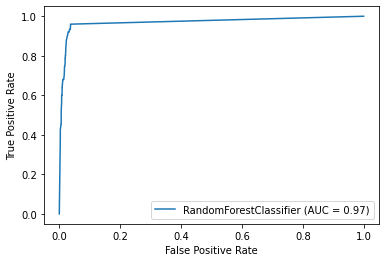

TRAIN: [    0     1     2 ... 30815 30816 30817] TEST: [ 7705  7706  7707 ... 15407 15408 15409]
[0 0 0 ... 1 1 1] 15249 [0 0 0 ... 0 0 0] 160 7705
[[7240  305]
 [   1  159]]
------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      7545
           1       0.34      0.99      0.51       160

    accuracy                           0.96      7705
   macro avg       0.67      0.98      0.74      7705
weighted avg       0.99      0.96      0.97      7705

************************************************************


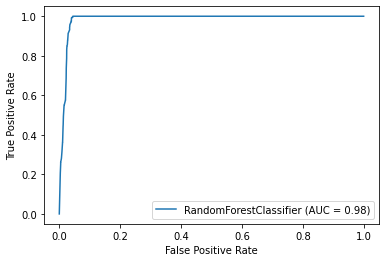

TRAIN: [    0     1     2 ... 30815 30816 30817] TEST: [15410 15411 15412 ... 23111 23112 23113]
[0 0 0 ... 1 1 1] 7939 [0 0 0 ... 1 1 1] 7470 7704
[[ 195   39]
 [  62 7408]]
------------------------------
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       234
           1       0.99      0.99      0.99      7470

    accuracy                           0.99      7704
   macro avg       0.88      0.91      0.89      7704
weighted avg       0.99      0.99      0.99      7704

************************************************************


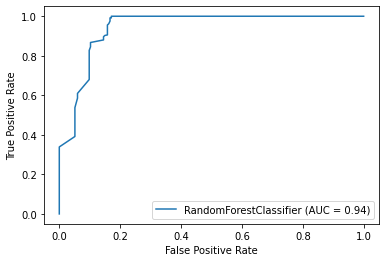

TRAIN: [    0     1     2 ... 23111 23112 23113] TEST: [23114 23115 23116 ... 30815 30816 30817]
[0 0 0 ... 1 1 1] 7705 [1 1 1 ... 1 1 1] 7704 7704
[[   0    0]
 [  21 7683]]
------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00      7704

    accuracy                           1.00      7704
   macro avg       0.50      0.50      0.50      7704
weighted avg       1.00      1.00      1.00      7704

************************************************************


c:\python36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python36\lib\site-packages\sklearn\metrics\_ranking.py:805: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
c:\python36\lib\site-packages\sklearn\metrics\_ranking.py:89: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


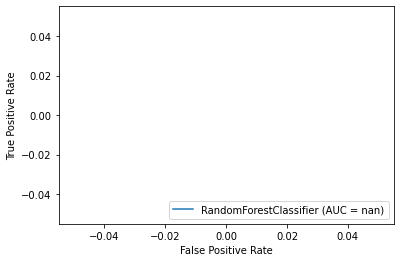

In [14]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    print(y_train,sum(y_train),y_test,sum(y_test),len(y_test))
    
    
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    repot = classification_report(y_test, ypred)
    print(30*'-')
    print(repot)
    print(60*'*')
    plot_roc_curve(clf, X_test, y_test)
    plt.show()